

# Session 5: Text Mining (II)

Pelin GUNDOGDU

## Exercise 2: TF-IDF

1. Write a function `tf` that receives a string and a spaCy `Doc` and returns the number of times the word appears in the `lemmatize`d `Doc`
2. Write a function `idf` that receives a string and a list of spaCy `Doc`s and returns the number of docs that contain the word
3. Write a function `tf_idf` that receives a string, a spaCy `Doc` and a list of spaCy `Doc`s and returns the product of `tf(t, d) · idf(t, D)`.
4. Write a function `all_lemmas` that receives a list of `Doc`s and returns a `set` of all available `lemma`s
5. Write a function `tf_idf_doc` that receives a `Doc` and a list of `Doc`s and returns a dictionary of `{lemma: TF-IDF value}`, corresponding to each the lemmas of all the available documents
6. Write a function `tf_idf_scores` that receives a list of `Doc`s and returns a `DataFrame` displaying the lemmas in the columns and the documents in the rows.
7. Visualize the TF-IDF, like this:


In [1]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# change the max width of pandas rows and columns to display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
t0 = "China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy."
t1 = "At last, China seems serious about confronting an endemic problem: domestic violence and corruption."
t2 = "Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people."
t3 = "Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled."
t4 = "What's the future of Abenomics? We asked Shinzo Abe for his views"
t5 = "Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily."
t6 = "Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses."

In [3]:
nlp = spacy.load('en')
docs = [nlp(text) for text in (t0,t1,t2,t3,t4,t5,t6)]

In [4]:
#Exercies 2 - 0
def lemmatize2(docName):
    #nlp_esa = nlp(docName)
    lemma = [ 
        words.lemma_ for words in docName
            if (words.lower_ not in STOP_WORDS 
                #or words.text == 'US'
               )
                and words.is_punct != True 
                and words.is_space != True 
                and words.is_digit != True
                #and not words.tag_ == 'POS'
                #and words.text == "'s"
        ]
    return(lemma)

### 1. Write a function tf that receives a string and a spaCy Doc and returns the number of times the word appears in the lemmatized Doc

In [5]:
# Exercise 2 - 1
def tf (string, doc):
    st = string.lower()
    lemma = lemmatize2(doc)
    for w in list(set(lemma)) :
        count = lemma.count(st)
    if count > 0:
        return count
    # if string not in document return 0
    else:
        return 0

tf("be", nlp(t4))

1

### 2. Write a function idf that receives a string and a list of spaCy Docs and returns the inverse of the number of docs that contain the word

In [6]:
#Exercise 2 - 2
def idf (string, listofDoc):
    st = string.lower()
    count = 0
    for w in listofDoc :
        lemma = lemmatize2(w)
        if lemma.count(st) > 0:
            count+=1
    if count > 0:
        return 1/count
    # if string not in document return 0
    else:
        return 0

idf("Be", docs)

1.0

### 3. Write a function tf_idf that receives a string, a spaCy Doc and a list of spaCy Docs and returns the product of tf(t, d) · idf(t, D).

In [7]:
#Exercise 2 - 3
def tf_idf(string, doc, listofDoc):
    tf_index = tf(string, doc)
    idf_index = idf(string, listofDoc)
    tfxidf = tf_index * idf_index
    #print(st, "tf index =", tf_index, "idf index =", idf_index, "tf*idf =", tfxidf ) 
    return tfxidf
        
tf_idf("Abenomics", nlp(t4), docs)

1.0

### 4. Write a function all_lemmas that receives a list of Docs and returns a set of all available lemmas

In [8]:
#Exercise 2 - 4
def all_lemmas(listofDoc):
    set_lemma = set()
    for w in listofDoc:
        lemma = lemmatize2(w)
        set_lemma |= (set(lemma))
    return(set_lemma)

all_lemmas(docs)

{"'s",
 'abe',
 'abenomics',
 'accelerate',
 'ask',
 'be',
 'china',
 'confront',
 'corruption',
 'country',
 'cuba',
 'daily',
 'deer',
 'differ',
 'domestic',
 'ease',
 'economic',
 'economy',
 'endemic',
 'fall',
 'find',
 'fix',
 'future',
 'greatly',
 'grow',
 'hard',
 'heal',
 'horse',
 'hunt',
 'japan',
 'minister',
 'obama',
 'pace',
 'people',
 'politically',
 'prime',
 'problem',
 'putin',
 'rapid',
 'rid',
 'ruble',
 'russia',
 'russian',
 'sanction',
 'shinzo',
 'shirt',
 'strong',
 'thing',
 'tumble',
 'turmoil',
 'value',
 'view',
 'violence',
 'vladimir',
 'work'}

### 5. Write a function tf_idf_doc that receives a Doc and a list of Docs and returns a dictionary of {lemma: TF-IDF value}, corresponding to each the lemmas of all the available documents

In [9]:
#Exercise 2 - 5
def tf_idf_doc(doc, listofDoc):
    score = {all_lemma : tf_idf(all_lemma, doc, listofDoc) for all_lemma in all_lemmas(listofDoc)}
    return score

tf_idf_doc(nlp(t5), docs)

{'people': 0.0,
 'obama': 1.0,
 'economic': 0.0,
 'china': 0.0,
 'turmoil': 0.0,
 'find': 0.0,
 'rapid': 0.0,
 'work': 0.0,
 'violence': 0.0,
 'russia': 0.0,
 'value': 1.0,
 'shirt': 0.0,
 'heal': 0.0,
 'rid': 0.0,
 'economy': 0.3333333333333333,
 'ruble': 0.5,
 'country': 0.0,
 'hard': 0.0,
 'ask': 0.0,
 'putin': 0.0,
 'shinzo': 0.0,
 'daily': 1.0,
 'cuba': 1.0,
 'endemic': 0.0,
 'russian': 1.0,
 'domestic': 0.0,
 'pace': 0.0,
 'prime': 0.0,
 'abe': 0.0,
 'fall': 1.0,
 'greatly': 0.0,
 'horse': 0.0,
 'ease': 1.0,
 'vladimir': 0.0,
 'abenomics': 0.0,
 'tumble': 0.0,
 'fix': 0.0,
 "'s": 0.5,
 'grow': 0.0,
 'japan': 0.0,
 'view': 0.0,
 'politically': 0.0,
 'strong': 0.0,
 'sanction': 1.0,
 'corruption': 0.0,
 'minister': 0.0,
 'future': 0.0,
 'hunt': 0.0,
 'problem': 0.0,
 'differ': 0.0,
 'thing': 0.0,
 'accelerate': 1.0,
 'confront': 0.0,
 'deer': 0.0,
 'be': 0.0}

### 6. Write a function tf_idf_scores that receives a list of Docs and returns a DataFrame displaying the lemmas in the columns and the documents in the rows.

In [10]:
#Exercise 2 - 6
def tf_idf_scores(listofDoc):
    #len_doc = len(listofDoc)
    #len_all = len(all_lemmas(listofDoc))   
    rows = [
        tf_idf_doc(text, listofDoc) for text in listofDoc
    ]
    df = pd.DataFrame(data = rows)    
    return (df)

data = tf_idf_scores(docs)
data

,'s,abe,abenomics,accelerate,ask,be,china,confront,corruption,country,cuba,daily,deer,differ,domestic,ease,economic,economy,endemic,fall,find,fix,future,greatly,grow,hard,heal,horse,hunt,japan,minister,obama,pace,people,politically,prime,problem,putin,rapid,rid,ruble,russia,russian,sanction,shinzo,shirt,strong,thing,tumble,turmoil,value,view,violence,vladimir,work
0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.5
4,0.0,0.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
5,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 7. Visualize the TF-IDF, like this:

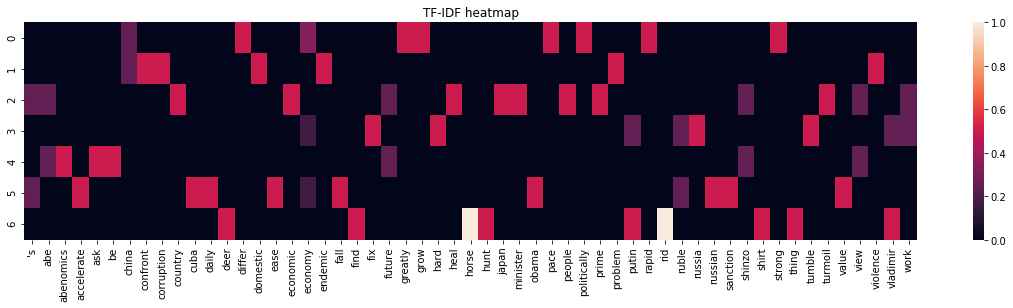

In [11]:
#Exercise 2 - 7
plt.figure(figsize=(20,4))
plt.title('TF-IDF heatmap')
#data.min().min() finds the minimum value of table,
#data.max().max() finds the maximum value of table
data_norm = (data - data.min().min())/(data.max().max() - data.min().min())
sns.heatmap(data_norm)